In [1]:
import os, sys, cv2, time
old_stdout = sys.stdout

import configparser
import numpy as np
import matplotlib.pyplot as plt

from contextlib import contextmanager
from simplenet_cifar10 import *
from PIL import Image
@contextmanager
def silence_stdout():
    old_target = sys.stdout
    try:
        with open(os.devnull, "w") as new_target:
            sys.stdout = new_target
            yield new_target
    finally:
        sys.stdout = old_target

memory allocation...
memory allocation...: done
memory allocation...
memory allocation...: done
memory allocation...
memory allocation...: done
memory allocation...
memory allocation...: done
memory allocation...
memory allocation...: done
shape of wgt:  (32, 16, 3, 3)
shape of wgt:  (64, 32, 3, 3)
shape of wgt:  (64, 64, 3, 3)
shape of wgt:  (64, 64, 3, 3)
shape of wgt:  (64, 64, 3, 3)


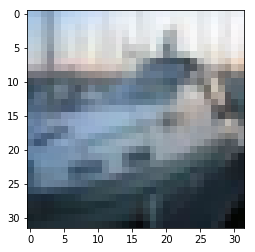

In [2]:
I = Image.open('./files/ship2truck.png')
# I = Image.open('./files/plane.png')

I = I.convert("RGB")
I_array = np.array(I)
# I_array = cv2.resize(I_array, (64,64))

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    #npimg = img.numpy()
    plt.imshow(img)
    plt.show()
    #return npimg
imshow(I_array)

In [3]:
inference(I_array)

executing layers...
layer 0, IFM size = (32, 32, 3), WGT size = (32, 3, 3, 3), OFM size = (16, 16, 32), time = 0.9567450033500791(ms)
layer 1, IFM size = (16, 16, 32), WGT size = (64, 32, 3, 3), OFM size = (8, 8, 64), time = 0.917880970519036(ms)
layer 2, IFM size = (8, 8, 64), WGT size = (64, 64, 3, 3), OFM size = (4, 4, 64), time = 0.7614250062033534(ms)
layer 3, IFM size = (4, 4, 64), WGT size = (64, 64, 3, 3), OFM size = (2, 2, 64), time = 0.592648983001709(ms)
layer 4, IFM size = (2, 2, 64), WGT size = (64, 64, 3, 3), OFM size = (1, 1, 64), time = 0.5812080344185233(ms)
layer 5, IFM size = (1, 1, 64), WGT size = (1, 1, 64), OFM size = (1, 1, 64), time = 0.110041000880301(ms)
layer 6, IFM size = (1, 1, 64), WGT size = (512, 64), OFM size = (1, 1, 512), time = 0.8193210233002901(ms)
layer 7, IFM size = (1, 1, 512), WGT size = (101, 512), OFM size = (1, 1, 101), time = 0.10320101864635944(ms)


'truck'

In [ ]:
%timeit inference(I_array)